<a href="https://colab.research.google.com/github/Ember1995/goit-np/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Підключення бібліотек

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import gdown
import numpy as np
from sklearn.decomposition import TruncatedSVD

Завантаження зображень в Colab за допомогою функції imread з бібліотеки matplotlib.

Downloading...
From: https://drive.google.com/uc?id=1u09os_FD0jkl_gqEy0sZDx5A7miiRGO_
To: /content/pic_1.jpg
100%|██████████| 201k/201k [00:00<00:00, 10.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_XMosPo962ZkM-DrgumsdkMvSapemmHP
To: /content/pic_2.jpg
100%|██████████| 401k/401k [00:00<00:00, 21.7MB/s]


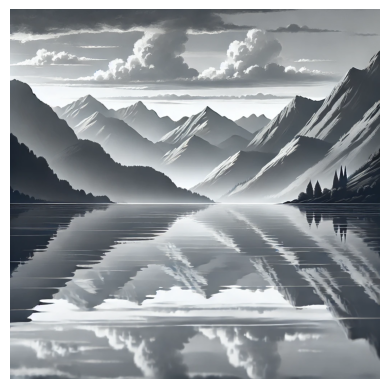

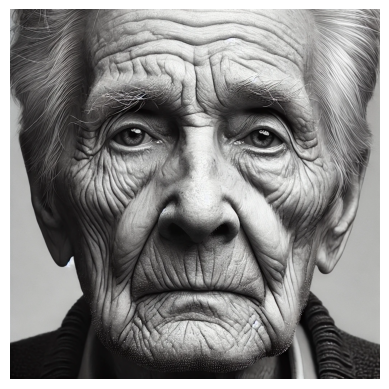

In [ ]:
# Функція для завантаження файлу з Google Drive
def download_file_from_google_drive(file_id, dest_path):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', dest_path, quiet=False)

# Google Drive ID  та шляхи збереження
file_id_1 = '1u09os_FD0jkl_gqEy0sZDx5A7miiRGO_'
file_id_2 = '1_XMosPo962ZkM-DrgumsdkMvSapemmHP'
dest_path_1 = 'pic_1.jpg'
dest_path_2 = 'pic_2.jpg'

# Завантаження зображень
download_file_from_google_drive(file_id_1, dest_path_1)
download_file_from_google_drive(file_id_2, dest_path_2)

# Читання та відображення першого зображення
try:
    img1 = mpimg.imread(dest_path_1)
    plt.imshow(img1)
    plt.axis('off')  # Вимкнути осі для чистішого вигляду
    plt.show()
except Exception as e:
    print(f"Сталася помилка під час відображення першого зображення: {e}")

# Читання та відображення другого зображення
try:
    img2 = mpimg.imread(dest_path_2)
    plt.imshow(img2)
    plt.axis('off')  # Вимкнути осі для чистішого вигляду
    plt.show()
except Exception as e:
    print(f"Сталася помилка під час відображення другого зображення: {e}")


Визначення розміру зображень за допомогою функції shape.

In [ ]:
# Визначення розміру першого зображення
print("Розмір першого зображення:", img1.shape)

# Визначення розміру другого зображення
print("Розмір другого зображення:", img2.shape)

Розмір першого зображення: (1024, 1024, 3)
Розмір другого зображення: (1024, 1024, 3)


Зміна форми зображень у 2D-матрицю шляхом укладання кольорових каналів горизонтально

In [ ]:
# Зміна форми першого зображення
height, width, channels = img1.shape
flat_img1 = img1.reshape(height, width * channels)

# Зміна форми другого зображення
height, width, channels = img2.shape
flat_img2 = img2.reshape(height, width * channels)

Застосування SVD декомпозиції за допомогою функції svd з бібліотеки numpy.

In [ ]:
# Застосування SVD декомпозиції до першого зображення
U1, S1, Vh1 = np.linalg.svd(flat_img1, full_matrices=False)

# Застосування SVD декомпозиції до другого зображення
U2, S2, Vh2 = np.linalg.svd(flat_img2, full_matrices=False)

Візуалізація перших k значень матриці Σ за допомогою matplotlib

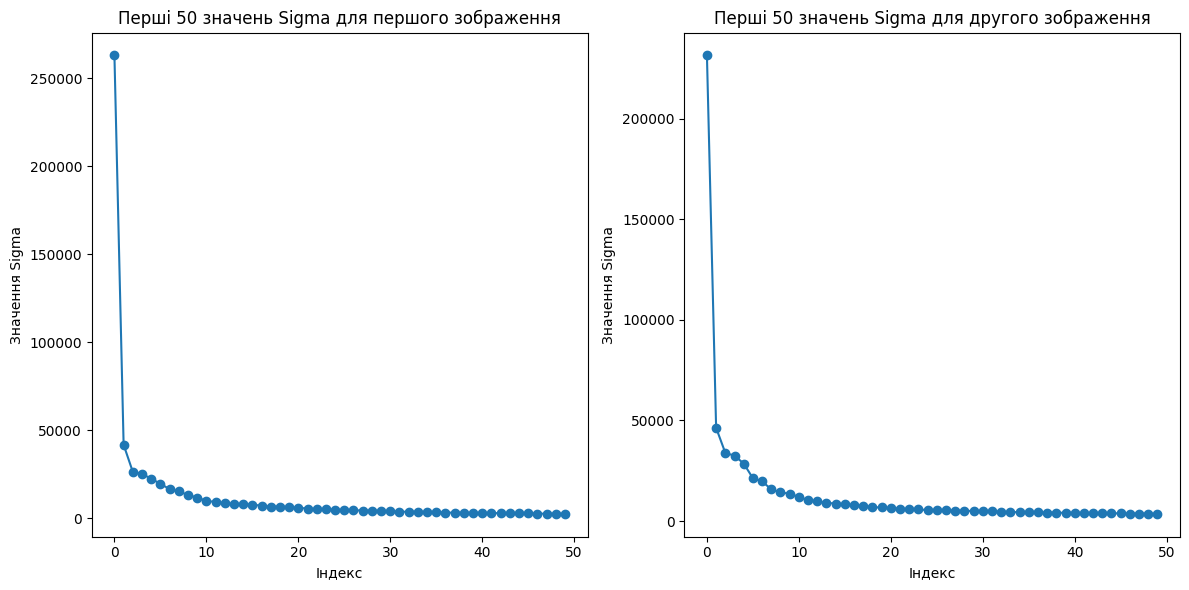

In [ ]:
# Візуалізація перших k значень матриці Σ для обох зображень
k = 50  # Кількість перших значень, які ми хочемо відобразити

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(k), S1[:k], marker='o')
plt.title('Перші {} значень Sigma для першого зображення'.format(k))
plt.xlabel('Індекс')
plt.ylabel('Значення Sigma')

plt.subplot(1, 2, 2)
plt.plot(np.arange(k), S2[:k], marker='o')
plt.title('Перші {} значень Sigma для другого зображення'.format(k))
plt.xlabel('Індекс')
plt.ylabel('Значення Sigma')

plt.tight_layout()
plt.show()

Кількість компонентів для усіченого SVD = 50

Помилка реконструкції для першого зображення: 128.04178456758316
Помилка реконструкції для другого зображення: 339.09427436076663


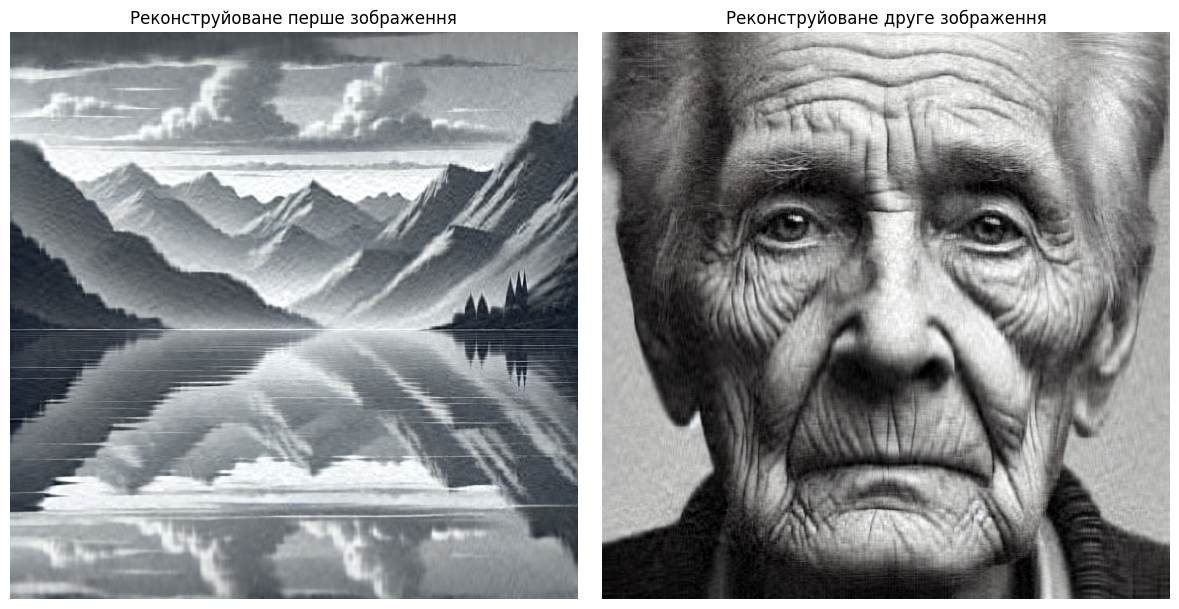

In [ ]:
k_components = 50

# Стиснення зображень за допомогою TruncatedSVD
svd1 = TruncatedSVD(n_components=k_components)
truncated_img1 = svd1.fit_transform(flat_img1)

svd2 = TruncatedSVD(n_components=k_components)
truncated_img2 = svd2.fit_transform(flat_img2)

# Реконструкція зображень
reconstructed_img1 = svd1.inverse_transform(truncated_img1)
reconstructed_img2 = svd2.inverse_transform(truncated_img2)

# Розрахунок помилки реконструкції
reconstruction_error1 = np.mean(np.square(reconstructed_img1 - flat_img1))
reconstruction_error2 = np.mean(np.square(reconstructed_img2 - flat_img2))

print(f'Помилка реконструкції для першого зображення: {reconstruction_error1}')
print(f'Помилка реконструкції для другого зображення: {reconstruction_error2}')

# Зміна форми реконструйованих зображень до оригінальної 3D-форми
reconstructed_img1 = reconstructed_img1.reshape(height, width, channels)
reconstructed_img1 = np.clip(reconstructed_img1, 0, 255).astype('uint8')

reconstructed_img2 = reconstructed_img2.reshape(height, width, channels)
reconstructed_img2 = np.clip(reconstructed_img2, 0, 255).astype('uint8')

# Відображення реконструйованих зображень
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(reconstructed_img1)
plt.axis('off')
plt.title('Реконструйоване перше зображення')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img2)
plt.axis('off')
plt.title('Реконструйоване друге зображення')

plt.tight_layout()
plt.show()

Кількість компонентів для усіченого SVD = 100

Помилка реконструкції для першого зображення: 66.2998327890488
Помилка реконструкції для другого зображення: 207.72627573854234


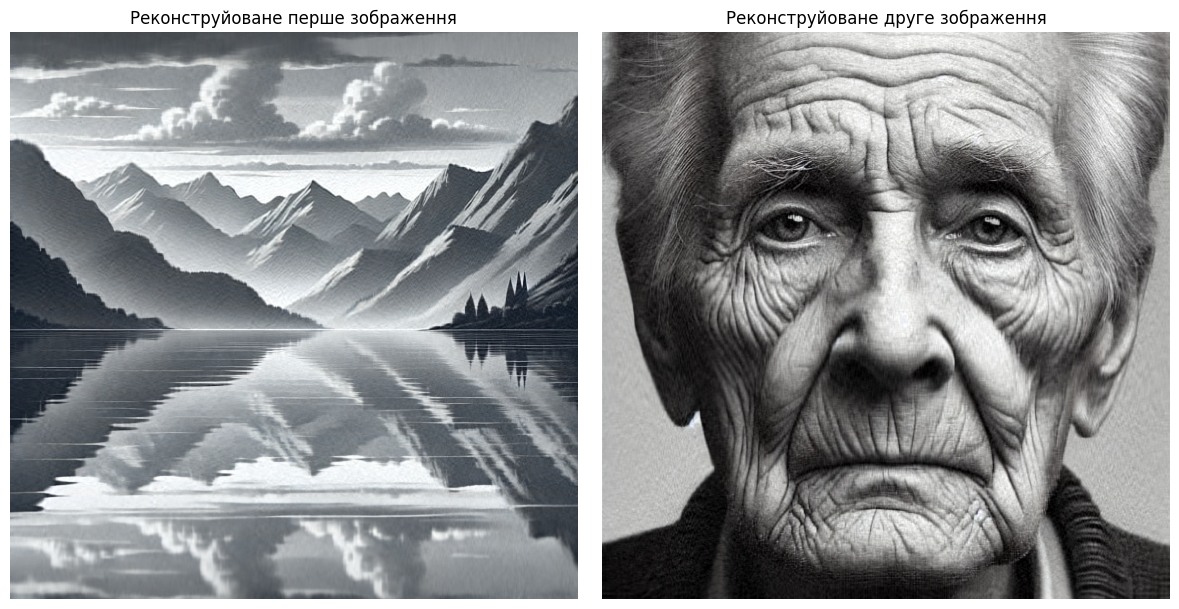

In [ ]:
k_components = 100

# Стиснення зображень за допомогою TruncatedSVD
svd1 = TruncatedSVD(n_components=k_components)
truncated_img1 = svd1.fit_transform(flat_img1)

svd2 = TruncatedSVD(n_components=k_components)
truncated_img2 = svd2.fit_transform(flat_img2)

# Реконструкція зображень
reconstructed_img1 = svd1.inverse_transform(truncated_img1)
reconstructed_img2 = svd2.inverse_transform(truncated_img2)

# Розрахунок помилки реконструкції
reconstruction_error1 = np.mean(np.square(reconstructed_img1 - flat_img1))
reconstruction_error2 = np.mean(np.square(reconstructed_img2 - flat_img2))

print(f'Помилка реконструкції для першого зображення: {reconstruction_error1}')
print(f'Помилка реконструкції для другого зображення: {reconstruction_error2}')

# Зміна форми реконструйованих зображень до оригінальної 3D-форми
reconstructed_img1 = reconstructed_img1.reshape(height, width, channels)
reconstructed_img1 = np.clip(reconstructed_img1, 0, 255).astype('uint8')

reconstructed_img2 = reconstructed_img2.reshape(height, width, channels)
reconstructed_img2 = np.clip(reconstructed_img2, 0, 255).astype('uint8')

# Відображення реконструйованих зображень
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(reconstructed_img1)
plt.axis('off')
plt.title('Реконструйоване перше зображення')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img2)
plt.axis('off')
plt.title('Реконструйоване друге зображення')

plt.tight_layout()
plt.show()

Кількість компонентів для усіченого SVD = 150

Помилка реконструкції для першого зображення: 40.268112129868506
Помилка реконструкції для другого зображення: 137.83801123452864


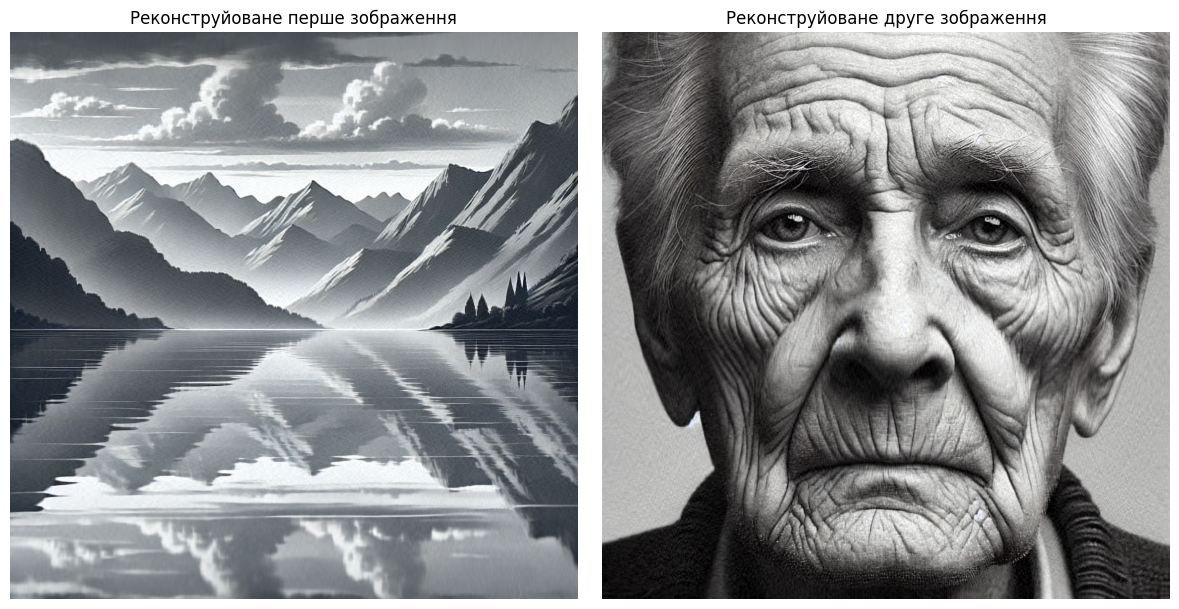

In [ ]:
k_components = 150

# Стиснення зображень за допомогою TruncatedSVD
svd1 = TruncatedSVD(n_components=k_components)
truncated_img1 = svd1.fit_transform(flat_img1)

svd2 = TruncatedSVD(n_components=k_components)
truncated_img2 = svd2.fit_transform(flat_img2)

# Реконструкція зображень
reconstructed_img1 = svd1.inverse_transform(truncated_img1)
reconstructed_img2 = svd2.inverse_transform(truncated_img2)

# Розрахунок помилки реконструкції
reconstruction_error1 = np.mean(np.square(reconstructed_img1 - flat_img1))
reconstruction_error2 = np.mean(np.square(reconstructed_img2 - flat_img2))

print(f'Помилка реконструкції для першого зображення: {reconstruction_error1}')
print(f'Помилка реконструкції для другого зображення: {reconstruction_error2}')

# Зміна форми реконструйованих зображень до оригінальної 3D-форми
reconstructed_img1 = reconstructed_img1.reshape(height, width, channels)
reconstructed_img1 = np.clip(reconstructed_img1, 0, 255).astype('uint8')

reconstructed_img2 = reconstructed_img2.reshape(height, width, channels)
reconstructed_img2 = np.clip(reconstructed_img2, 0, 255).astype('uint8')

# Відображення реконструйованих зображень
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(reconstructed_img1)
plt.axis('off')
plt.title('Реконструйоване перше зображення')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img2)
plt.axis('off')
plt.title('Реконструйоване друге зображення')

plt.tight_layout()
plt.show()

### Підсумок

Явне погіршення зображення спостерігаємо при k = 50.
